In [3]:
import numpy as np

import jiant.utils.python.io as py_io
import matplotlib.pyplot as plt

In [4]:
pparam = dict(xlabel='', ylabel='Evaluation Acc (\%)')

task_names = [
  "lexical-entail", "transitive", "hypernymy", "hyponymy", "ner",
  "verbnet", "verbcorner", "synt-alt", "synt-var",
  "boolean", "comparative", "conditional","counting",
  "negation", "quantifier", "monotonicity", "syllogism",
  "kg-relation","sentiment", "puns", "coreference", "sprl", "context-align",
  "proof-writer", "entail-tree", "atomic", "socialqa",
  "physicalqa", "social-chem", "logiqa", "drop", "cosmoqa",
  "ester", "spatia", "temporal", "counterfactual"
]

lexical_tasks = ["lexical-entail", "transitive", "hypernymy", "hyponymy"]
syntactic_tasks = ["verbnet", "verbcorner", "synt-alt", "synt-var"]
semantic_tasks = ["kg-relation",  "sentiment", "puns",
                  "context-align", "coreference", "sprl"]
logical_taasks = ["boolean", "comparative", "conditional", "counting",
                  "negation", "quantifier", "monotonicity", "syllogism"]
commonsense_tasks = ["atomic", "socialqa", "physicalqa", "social-chem"]
knowledge_tasks = ["proof-writer", "entail-tree"]
comprehension_tasks = ["logiqa", "drop", "cosmoqa", "ester"]
special_tasks = ["spatia", "temporal", "counterfactual"]

curriculum_tasks= [
  lexical_tasks, syntactic_tasks,
  semantic_tasks, logical_taasks,
  commonsense_tasks, knowledge_tasks,
  comprehension_tasks, special_tasks]

In [49]:
common_nli = py_io.read_json("./runs/zero-shot/anli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

name_convert = {
  "monotonicity": "monotonicity_infer",
  "lexical-entail": "lexical",
  "synt-alt": "syntactic_alternation",
  "kg-relation": "kg_relations",
  "context-align": "context_align",
  "entail-tree": "entailment_tree",
  "social-chem": "social_chem",
  "synt-var": "syntactic_variation",
  "proof-writer": "proof_writer",
}

def read_accuracy(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['acc']
      acc_list.append(round(acc*100, 1))
    else:
      acc_list.append(0)
  return acc_list

acc_list_anli = read_accuracy(task_names)

acc_anli_category = [read_accuracy(category) for category in curriculum_tasks]
acc_anli_avg = [sum(category_acc) / (len(category_acc) - category_acc.count(0)) for category_acc in acc_anli_category]

In [50]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_roberta/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_mnli = read_accuracy(task_names)

acc_mnli_category = [read_accuracy(category) for category in curriculum_tasks]
acc_mnli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [51]:
common_nli = py_io.read_json("./runs/zero-shot/mnli_bart/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/mnli_bart/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_bart_mnli = read_accuracy(task_names)

acc_bart_mnli_category = [read_accuracy(category) for category in curriculum_tasks]
acc_bart_mnli_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [225]:
common_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/commonnli_eval.json")
binary_nli = py_io.read_json("./runs/zero-shot/anli_xlnet/binarynli_eval.json")

common_nli = {**common_nli, **binary_nli}

acc_list_xlnet = read_accuracy(task_names)

acc_xlnet_category = [read_accuracy(category) for category in curriculum_tasks]
acc_xlnet_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_mnli_category]

In [226]:
common_nli = py_io.read_json("./runs/curriculum/roberta-base/val_metrics.json")

def read_accuracy_jiant(task_names):
  acc_list = []
  for task in task_names:
    name = task
    if task in name_convert:
      name = name_convert[task]
    if name in common_nli:
      acc = common_nli[name]['metrics']['major']
      acc_list.append(acc*100)
    else:
      print(name)
      acc_list.append(0)
  return acc_list

acc_list_glue = read_accuracy_jiant(task_names)

acc_glue_category = [read_accuracy_jiant(category) for category in curriculum_tasks]
acc_glue_avg = [sum(category) / (len(category) - category.count(0)) for category in acc_glue_category]

proofwriter
drop
spatia-tempo
numeric
counterfactual
drop
spatia-tempo
numeric
counterfactual
proofwriter
drop


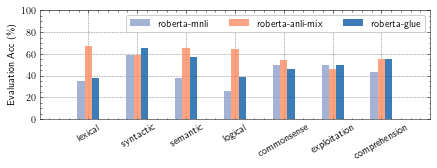

In [227]:
curriculum_category = [
  "lexical", "syntactic", "semantic",
  "logical", "commonsense",
  "exploitation",
  "comprehension"]
x = np.arange(len(curriculum_category))

width = 0.15
label = ["10", "1k"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(7, 2))
  ax = fig.add_subplot(111)

  #ax.bar(x - width*2, acc_mnli_avg, width, label=label[0], alpha=0.8)
  ax.bar(x - width, acc_mnli_avg, width, label=label[0], color="#8da0cb", alpha=0.8)
  ax.bar(x, acc_anli_avg, width, label=label[1], color="#fc8d62", alpha=0.8)
  ax.bar(x + width, acc_glue_avg, width, label=label[2], alpha=0.8)
  #ax.bar(x + width*2, acc_anli_avg, width, label=label[2], alpha=0.8)

  ax.set_xticks(x)
  plt.xticks(rotation = 30)
  ax.set_xticklabels(curriculum_category)
  #ax.set_title('Curriculum Benchmark')
  ax.legend(loc="upper right", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 7])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_avg.pdf')

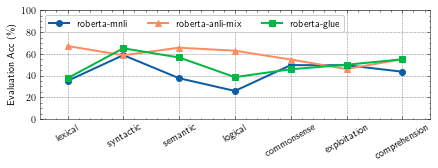

In [175]:
curriculum_category = [
  "lexical", "syntactic", "semantic",
  "logical", "commonsense",
  "exploitation",
  "comprehension"]
x = np.arange(len(curriculum_category))

width = 0.2
label = ["roberta-mnli", "roberta-anli-mix", "roberta-glue"]
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(7, 2))
  ax = fig.add_subplot(111)
  ax.plot(x, acc_mnli_avg, 'o-', label=label[0], linewidth=2)
  ax.plot(x, acc_anli_avg, '^-', label=label[1], color="#fc8d62", linewidth=2)
  ax.plot(x, acc_glue_avg, 's-', label=label[2], linewidth=2)

  ax.set_xticks(x)
  plt.xticks(rotation = 30)
  ax.set_xticklabels(curriculum_category)
  ax.legend(loc="upper left", ncol=3)
  ax.autoscale(tight=True)
  ax.set_xlim([-0.5, 6.5])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

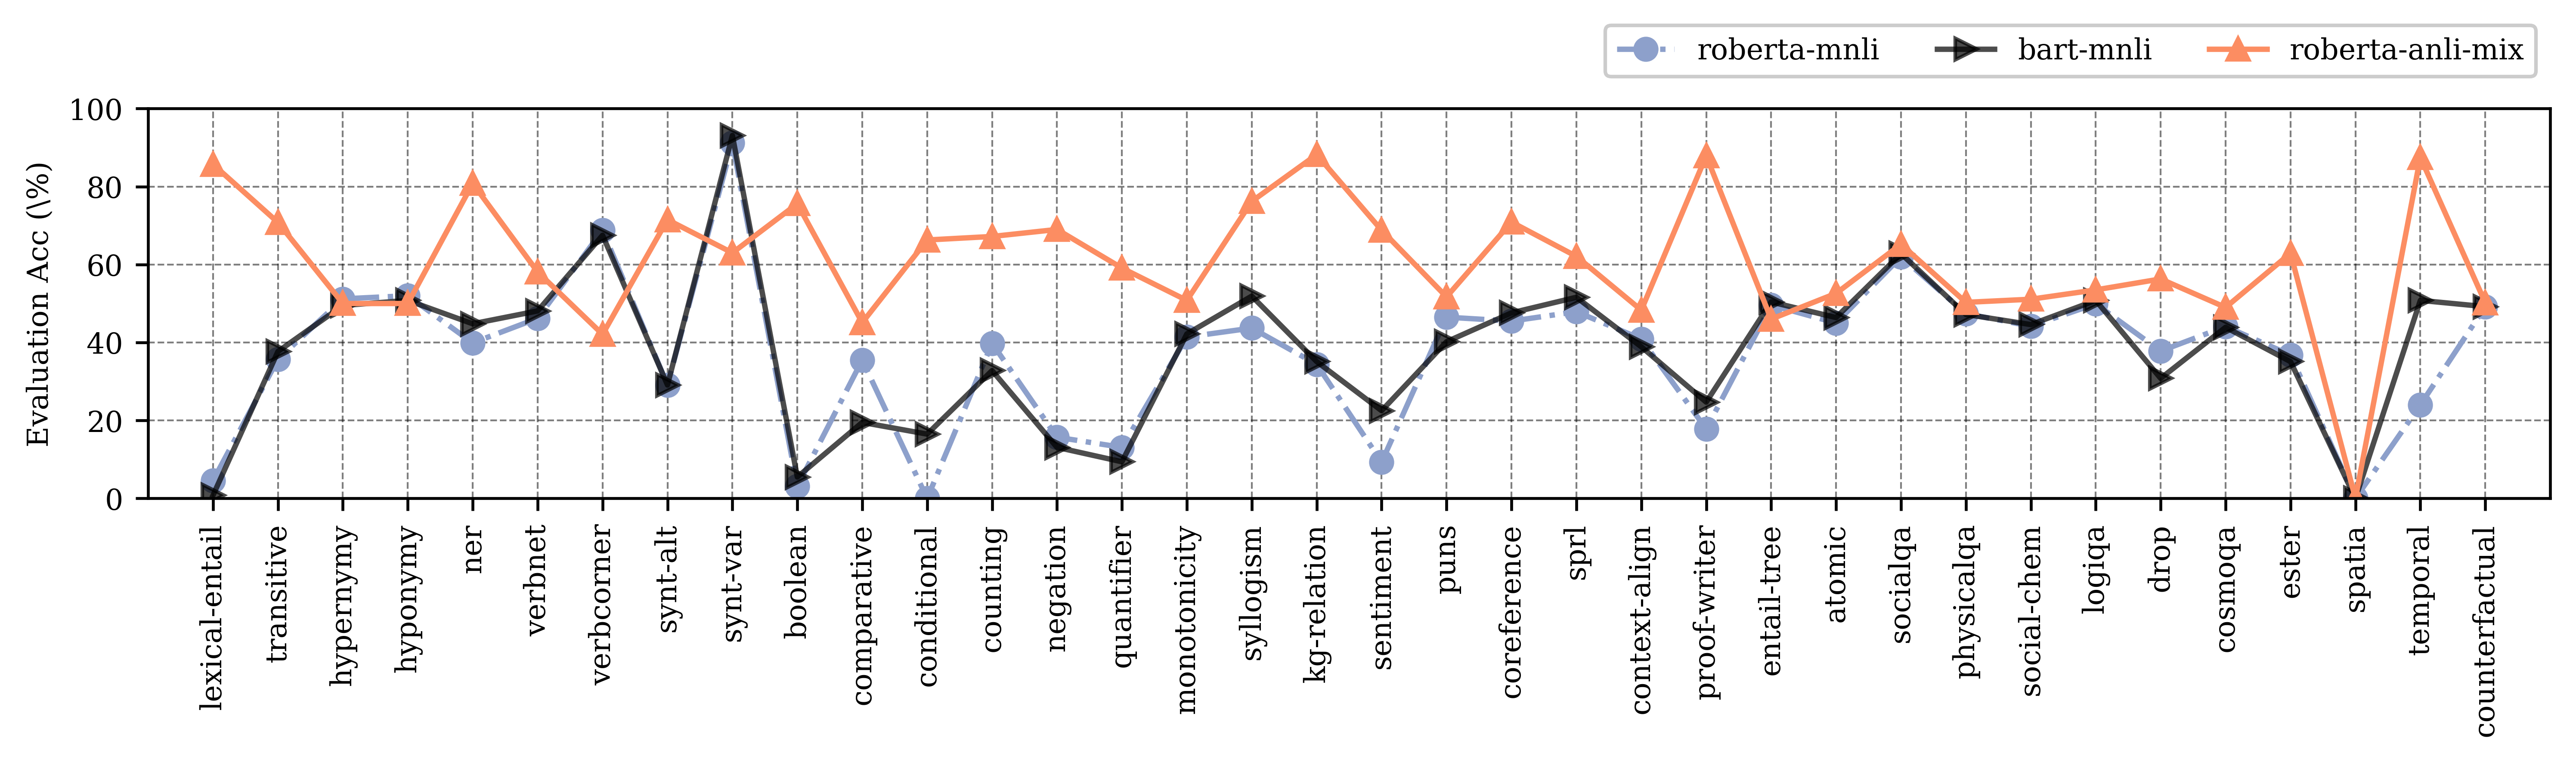

In [52]:
x = np.arange(len(task_names))
width = 0.15
label = ["roberta-mnli", "bart-mnli", "roberta-anli-mix", "xlnet-anli-mix", "roberta-glue"]
with plt.style.context(['ieee', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  #ax.bar(x - (width), acc_list1_mnli, width, label=label[0], alpha=0.7, color="#8da0cb")
  #ax.bar(x, acc_list1_anli, width, label=label[1], alpha=0.7,  color="#fc8d62")
  #ax.bar(x + (width), acc_list1_glue, width, label=label[2], alpha=0.7, )
  ax.plot(x, acc_list_mnli, 'o-.', label=label[0], color="#8da0cb")
  ax.plot(x, acc_list_bart_mnli, '>-', alpha=0.7, label=label[1])
  ax.plot(x, acc_list_anli, '^-', label=label[2], color="#fc8d62")
  #ax.plot(x, acc_list1_glue, 's-', label=label[3], alpha=0.7, linewidth=2)

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(task_names)
  #ax.set_title('Curriculum Benchmark')
  ax.legend(loc="upper right", ncol=4, bbox_to_anchor=(1, 1.25))
  ax.autoscale(tight=True)
  ax.set_xlim([-1, 36])
  ax.set_ylim([0, 100])
  ax.set(**pparam)

  fig.savefig(f'./curriculum/curriculum_label_1.pdf')

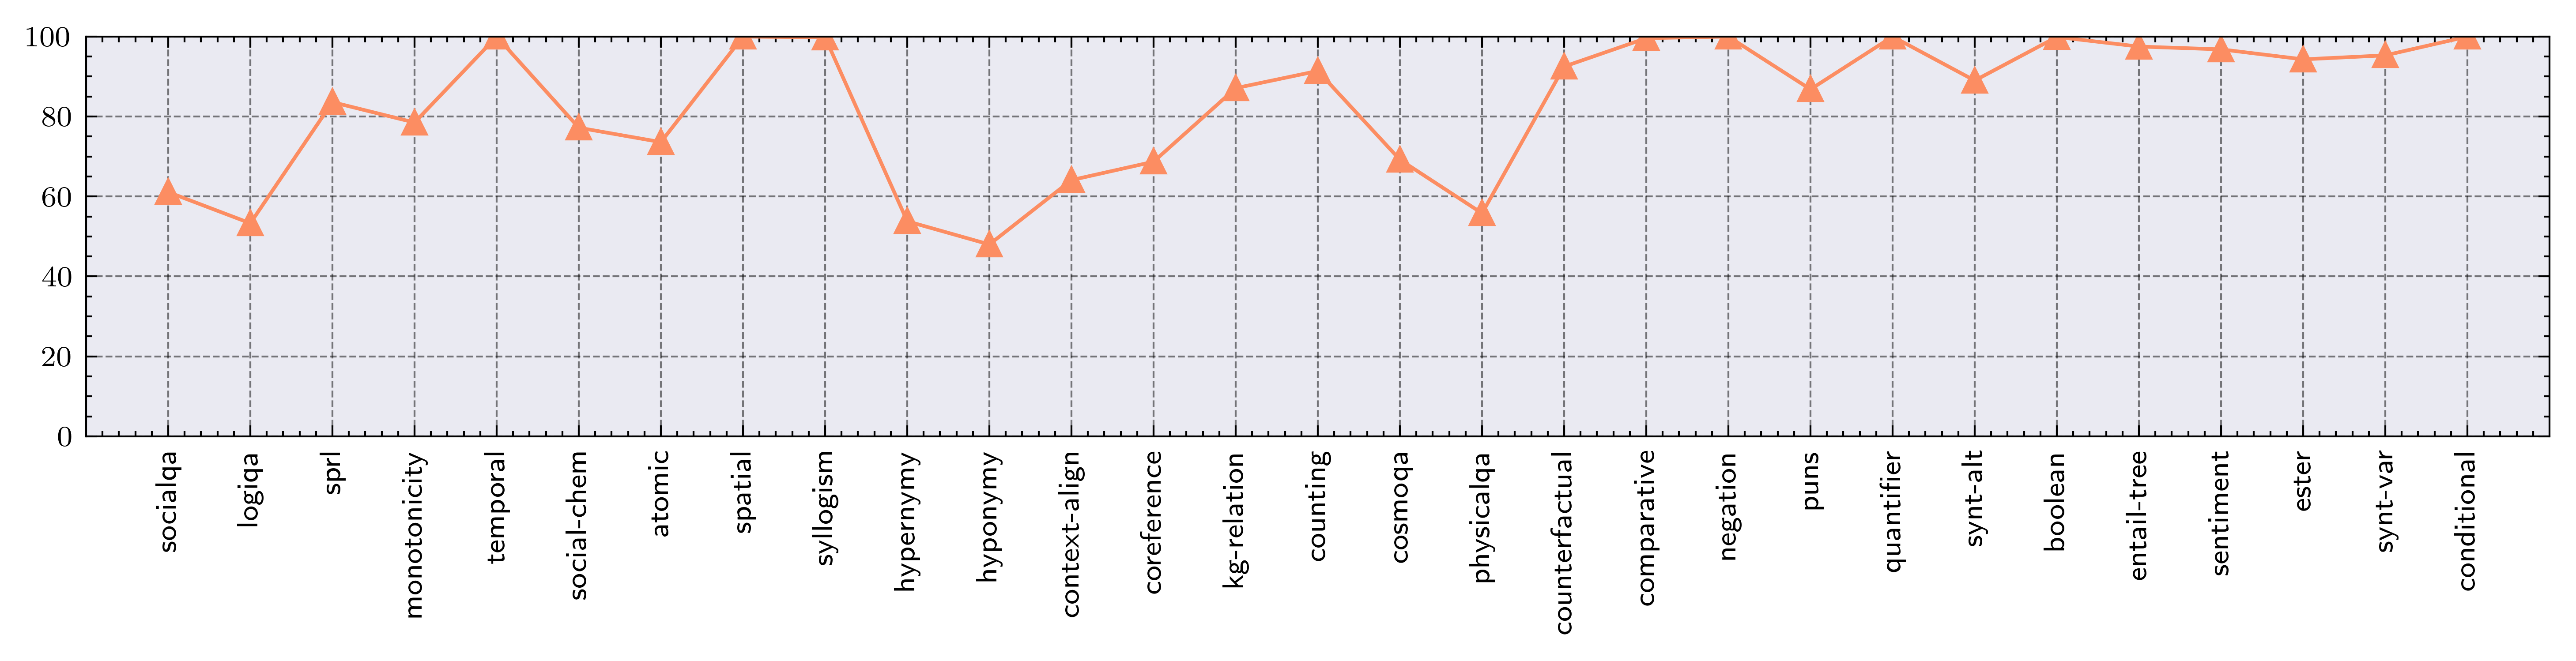

In [17]:
import numpy as np

name_convert = {
  "monotonicity": "monotonicity_infer",
  "lexical-entail": "lexical",
  "synt-alt": "syntactic_alternation",
  "kg-relation": "kg_relations",
  "context-align": "context_align",
  "entail-tree": "entailment_tree",
  "social-chem": "social_chem",
  "synt-var": "syntactic_variation",
  "proof-writer": "proof_writer"
}

inv_name = {v: k for k, v in name_convert.items()}

task_names = ["syntactic_inference", "logical_inference", "semantic_inference", "commonsense_inference", "knowledge_inference"]
task_names = ["curriculum_inference"]
#model_name = "anli-mix-roberta"
model_name = "roberta-anli"

labels = []
performance = []
colors = []

data_weak = "#fc8d62"
model_weak = "#8da0cb"

for task_name in task_names:
  acc_report = py_io.read_json(f"./runs/{task_name}/{model_name}/500-shot/acc_report.json")
  accuracy = [round(x['acc']* 100, 1) for x in acc_report.values()]
  performance += accuracy

  for task in acc_report:
    if task in inv_name:
      labels.append(inv_name[task])
    else:
      labels.append(task)

  for acc in accuracy:
    if acc > 70:
      colors.append(data_weak)
    else:
      colors.append(model_weak)


x = np.arange(len(labels))
width = 0.8

with plt.style.context(['science', 'ieee', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  ax.plot(x, performance, '-^', color="#fc8d62")
  #bars = ax.bar(x, performance, width)
  #for bar, color in zip(bars, colors):
  #  bar.set_color(color)

  #for bar in bars:
  #  bar.set_hatch("//")
  #  bar.set_edgecolor('k')

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(labels)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, len(labels)])
  ax.set_ylim([0, 100])
  ax.set_facecolor('#eaeaf2')

  fig.savefig(f'./plots/inoculation_{model_name}.pdf')

In [ ]:
with plt.style.context(['science', 'grid']):
  fig = plt.figure(figsize=(12, 2))
  ax = fig.add_subplot(111)
  bars = ax.bar(x, performance, width)
  for bar, color in zip(bars, colors):
    bar.set_color(color)

  for bar in bars:
    bar.set_hatch("//")
    bar.set_edgecolor('k')

  ax.set_xticks(x)
  plt.xticks(rotation = 90)
  ax.set_xticklabels(labels)
  ax.autoscale(tight=True)
  ax.set_xlim([-1, len(labels)])
  ax.set_ylim([0, 100])
  ax.set_facecolor('#eaeaf2')

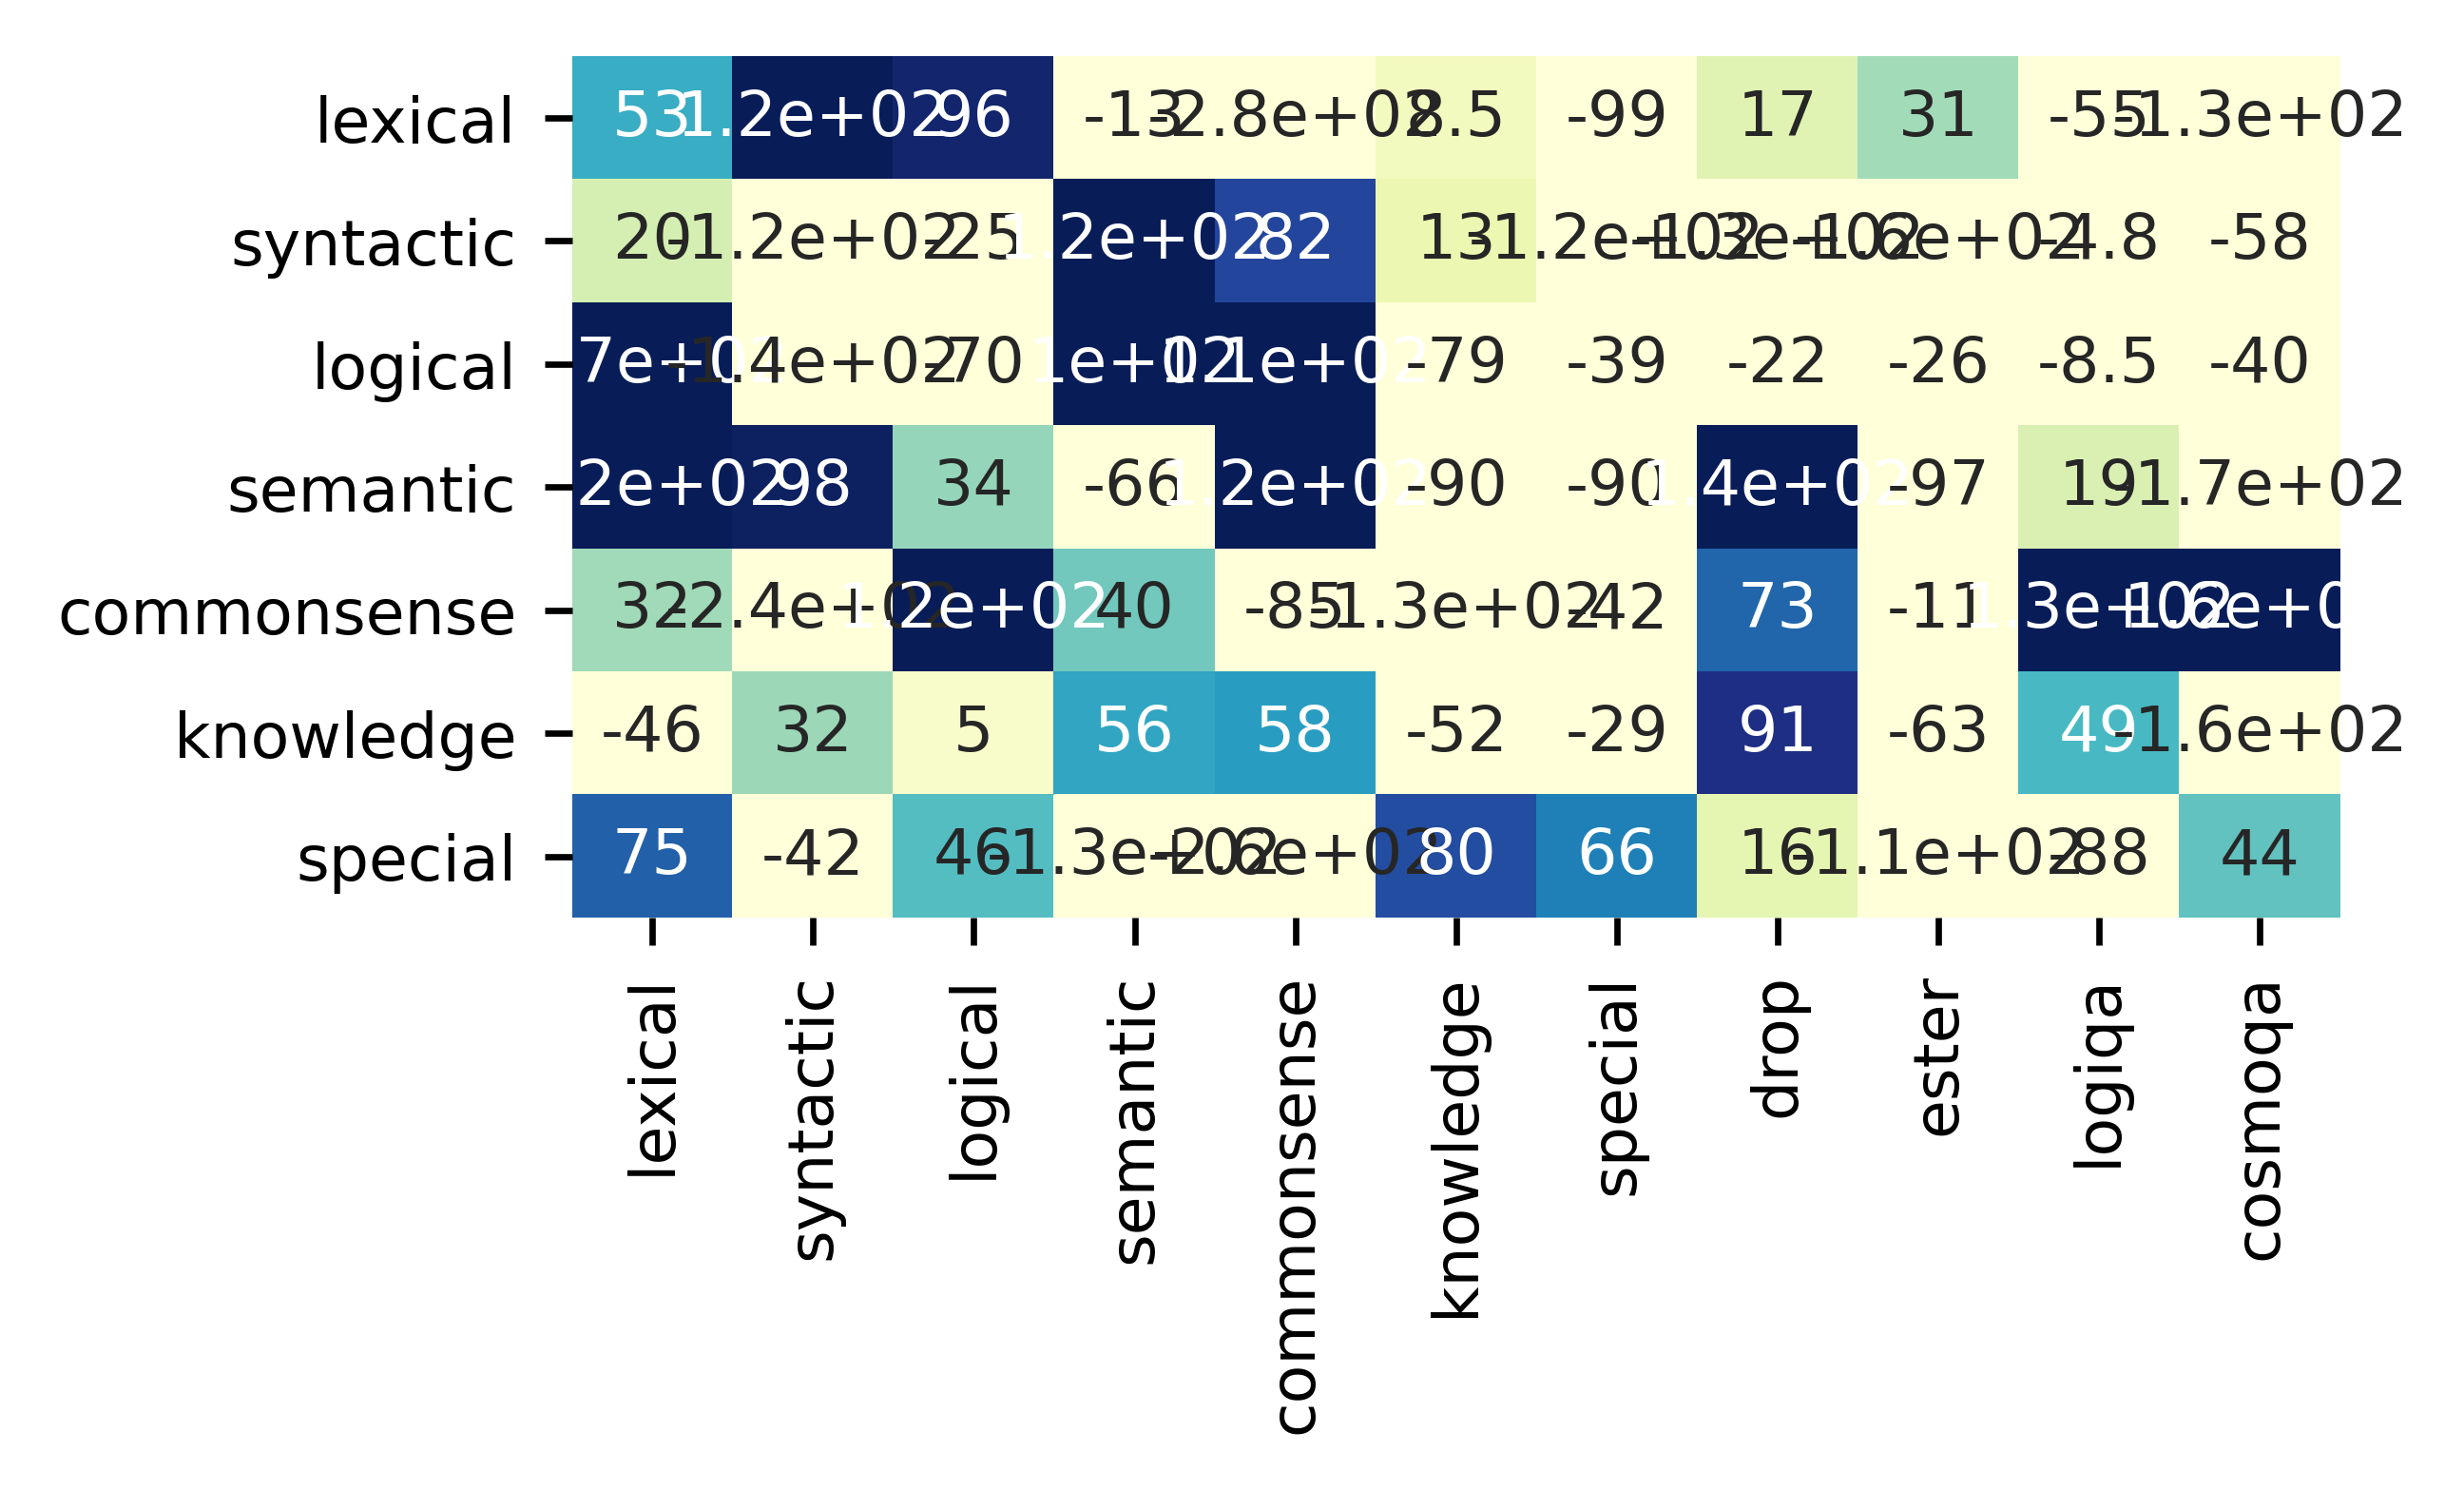

In [17]:
import seaborn as sn
import numpy as np

with plt.style.context(['ieee']):
  fig = plt.figure(figsize=(4, 2))
  ax = fig.add_subplot(111)
  #cmap = "YlGn"
  cmap = "YlGnBu"
  #cmap = sn.diverging_palette(145, 300, s=60, as_cmap=True)

  data = np.random.randn(7, 11)
  data = [[round(x*100, 1) for x in row] for row in data]
  train_sets = ["lexical","syntactic","logical","semantic","commonsense","knowledge","special"]
  val_sets = ["lexical","syntactic","logical","semantic","commonsense","knowledge","special","drop","ester","logiqa","cosmoqa"]

  plt.xticks(rotation = 30)
  hm = sn.heatmap(data=data, annot=True,
                  cbar=False, cmap=cmap,
                  xticklabels=val_sets,
                  yticklabels=train_sets,
                  ax=ax, vmin=0, vmax=100)
  plt.show()

In [211]:
task_names = ["transitive", "hypernymy", "hyponymy",
              "ner", "verbnet", "verbcorner", "syntactic_alternation", "conditional",
              "comparative", "counting", "quantifier",
              "negation",  "monotonicity_infer", "syllogism", "coreference",
              "sentiment", "kg_relations",
              "puns", "sprl", "context_align", "atomic",
              "social_chem", "socialqa", "physicalqa", "temporal",
              "spatial", "counterfactual", "proof_writer","entailment_tree",
              "logiqa", "drop", "cosmoqa"]
modes = [
  'simple_simple', 'simple_hard',
  'hard_simple', 'hard_hard']

def get_split_metric(task, mode):
  metrics = py_io.read_json(f"./runs/{task}/anli-mix-roberta/1000-shot-{mode}/val_metrics.json")
  acc = min(metrics['aggregated']*100, 99)
  return round(acc, 4)

plot_data = []
for task in task_names:
  split_metrics = np.array([get_split_metric(task, mode) for mode in modes])
  plot_data.append(split_metrics.reshape((2, 2)))

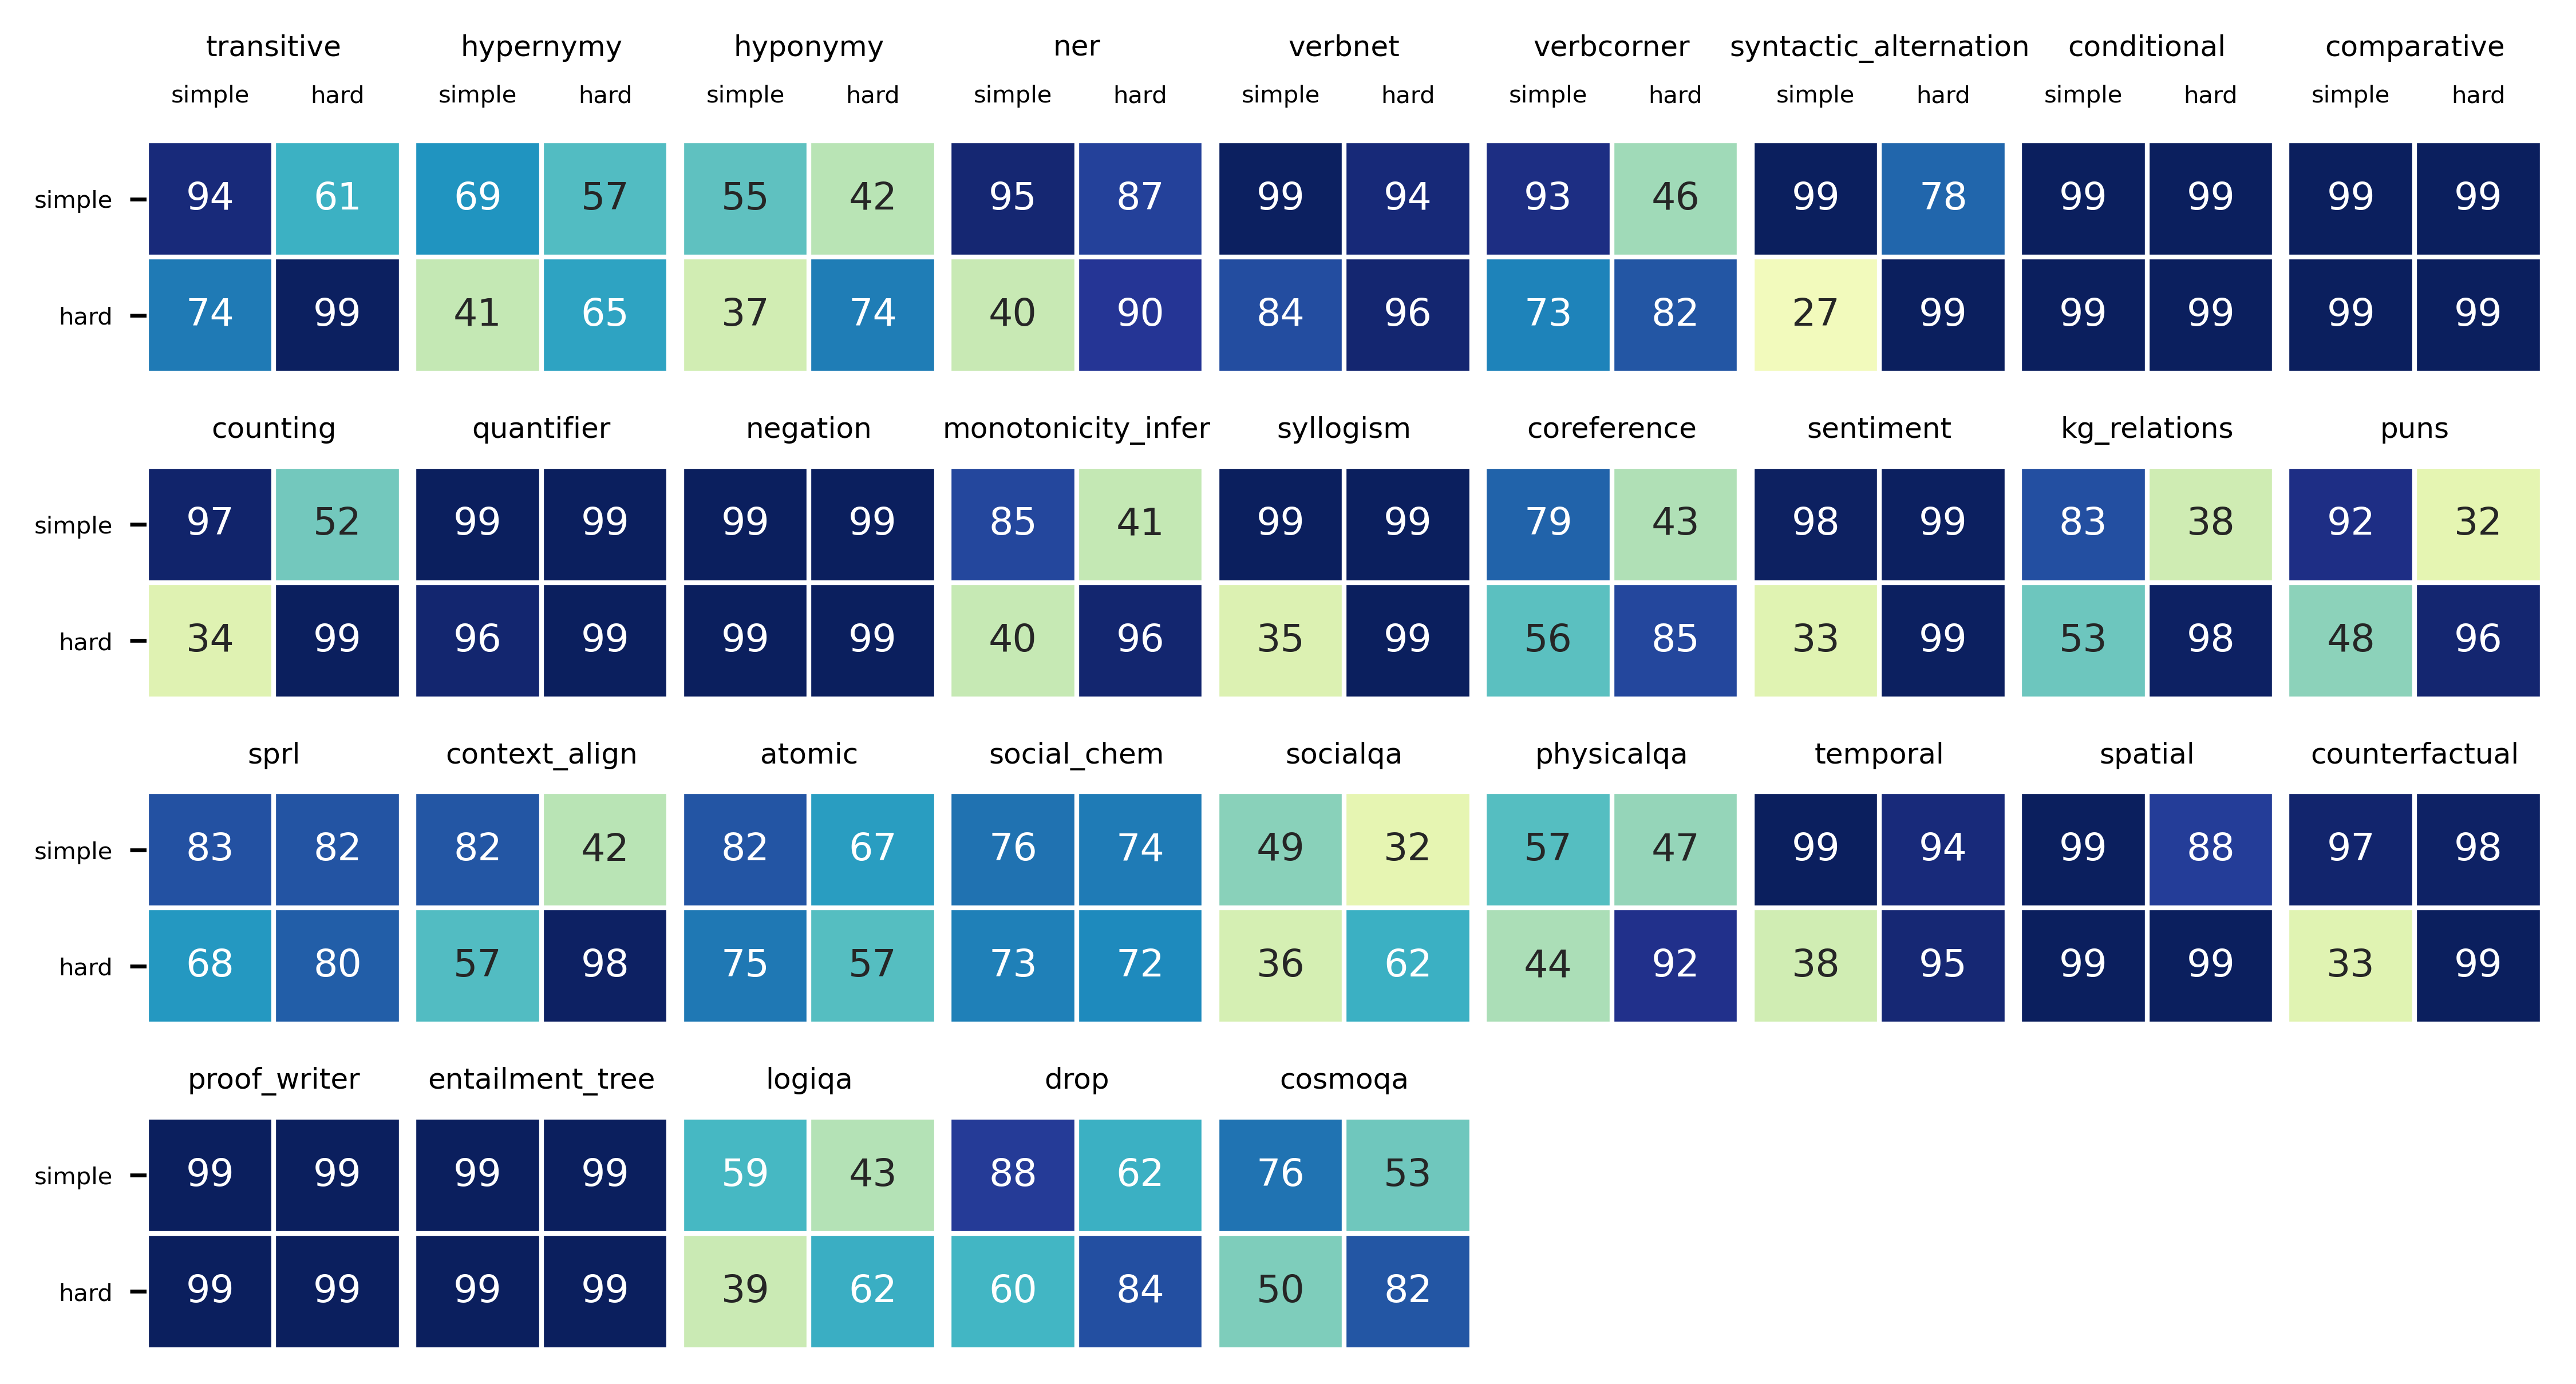

In [213]:
import seaborn as sn
import numpy as np

subplot_indices = [i for i in range(491, 491+36)]
cmap = "YlGnBu"
train_sets = ["simple", 'hard']
val_sets = ["simple", 'hard']

def plot_heatmap(data, fig, title, index):
  ax = fig.add_subplot(4, 9, index+1)
  plt.tick_params(labelbottom = False, bottom=False, top=False, labeltop=True)
  ax.set_title(title, fontsize=6)
  plt.xticks(rotation=0, fontsize=5)
  if index % 9 == 0:
    yticklabels = train_sets
  else:
    yticklabels = False
  if index < 9:
    xticklabels = train_sets
  else:
    xticklabels = False
  hm = sn.heatmap(data=data, annot=True,
                  cbar=False, cmap=cmap,
                  xticklabels=xticklabels,
                  yticklabels=yticklabels,
                  annot_kws={"fontsize":8},
                  ax=ax, vmin=20, vmax=100)
  plt.yticks(rotation=0, fontsize=5)

  for i in range(data.shape[0] + 1):
    ax.axhline(i, color='white', lw=1)
  for i in range(data.shape[1] + 1):
    ax.axvline(i, color='white', lw=1)

with plt.style.context(['ieee']):
  fig = plt.figure(figsize=(9, 4))
  fig.tight_layout()

  for i, (task, data) in enumerate(zip(task_names, plot_data)):
    plot_heatmap(data, fig, title=task, index=i)

  plt.subplots_adjust(bottom=0.0, wspace = 0.05, hspace = 0.4)
  plt.show()
  fig.savefig(f'./plots/controlled_generalize.pdf')

In [34]:
from math import log2
import jiant.utils.python.io as py_io

def get_dataset_entropy(class_counter, n_total):
  entropy = 0
  for label in class_counter.keys():
    prob = class_counter[label] / n_total
    prob_entropy = prob * log2(prob)
    #print(label)
    #print(prob)
    #print(prob_entropy)
    entropy += -prob_entropy
  return entropy

def get_information_gain(loss_main, loss_control, entropy):
  gain =  loss_control - loss_main
  gain_percent = gain / entropy
  return gain, gain_percent

def count_example_per_class(dataset):
    class_counter = {}
    for i, line in enumerate(dataset):
        label = line['gold_label']
        if label not in class_counter:
            class_counter[label] = 1
        else:
            class_counter[label] += 1
    return class_counter, i

In [76]:
def information_probing(task_name, model_name):
  base_metircs = py_io.read_json(f"./runs/curriculum/{model_name}/val_metrics.json")
  target_metircs = py_io.read_json(f"./runs/{task_name}/{model_name}/1000-shot/val_metrics.json")
  base_loss = base_metircs[task_name]['loss']
  target_loss = target_metircs[task_name]['loss']

  test_dataset = py_io.read_jsonl(f"/content/tasks/curriculum/{task_name}/val.jsonl")
  test_data_counter, test_n_total = count_example_per_class(test_dataset)

  test_entropy = get_dataset_entropy(test_data_counter, test_n_total)
  info_gain, gain_percent = get_information_gain(target_loss, base_loss, test_entropy)
  #print("Control Entropy: ", base_loss)
  #print("Main Entropy: ", target_loss)
  #print("Testset Entropy: ", test_entropy)
  #print("Mutual Information Gain: ", round(info_gain, 3))
  #print("Mutual Infromation Gain Percentage: ", round(gain_percent * 100, 1))
  return round(info_gain, 3), round(gain_percent * 100, 1)

information_probing("monotonicity_infer", "anli-mix-roberta")

(-0.447, -44.7)

In [71]:
challenges = [
  "hypernymy", "hyponymy", "verbnet", "coreference",
  "monotonicity_infer", "context_align", "entailment_tree",
  "drop", "logiqa", "ester", "cosmoqa", "atomic", "social_chem",
  "socialqa", "physicalqa", "spatial", "counterfactual"]

information_gain_report = {}

for task in challenges:
  info_gain, gain_percent = information_probing(task, "anli-mix-roberta")
  information_gain_report[task] = {
    "gain": info_gain,
    "gain_percent": gain_percent
  }

information_gain_report

{'monotonicity_infer': {'gain': -0.218, 'gain_percent': -21.9},
 'entailment_tree': {'gain': 1.084, 'gain_percent': 108.4},
 'context_align': {'gain': -0.65, 'gain_percent': -65.0},
 'drop': {'gain': 0.342, 'gain_percent': 49.3},
 'logiqa': {'gain': -0.82, 'gain_percent': -82.0},
 'ester': {'gain': 1.071, 'gain_percent': 114.7},
 'cosmoqa': {'gain': -0.32, 'gain_percent': -32.0},
 'atomic': {'gain': -0.139, 'gain_percent': -13.9},
 'social_chem': {'gain': 0.123, 'gain_percent': 12.3},
 'socialqa': {'gain': 0.143, 'gain_percent': 15.6},
 'physicalqa': {'gain': 0.135, 'gain_percent': 13.5},
 'temporal': {'gain': 0.78, 'gain_percent': 78.0}}

In [72]:
py_io.write_json(information_gain_report, "inocculate_information_gain")